In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime, timedelta

import warnings
warnings.filterwarnings('ignore')

from scipy import interpolate

In [2]:
file_path = './data/rainfall_train_v1.csv'
rainfall = pd.read_csv(file_path)
rainfall = rainfall.drop(['vv', 'stn4contest'], axis=1)
rainfall

,fc_month,fc_day,fc_hour,dh,ef_month,ef_day,ef_hour,v01,v02,v03,...,roll_v09,roll_rng_v01,roll_rng_v02,roll_rng_v03,roll_rng_v04,roll_rng_v05,roll_rng_v06,roll_rng_v07,roll_rng_v08,roll_rng_v09
0,5,1,9,21,5,2,6,42.0,5.0,0.0,...,0.0,10.50,1.666667,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,5,1,9,24,5,2,9,67.0,19.0,0.0,...,0.0,22.50,8.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,5,1,9,27,5,2,12,23.0,10.0,2.0,...,0.0,25.75,10.666667,0.666667,0.0,0.0,0.0,0.0,0.0,0.0
3,5,1,9,30,5,2,15,46.0,30.0,11.0,...,0.0,28.50,15.333333,4.333333,0.0,0.0,0.0,0.0,0.0,0.0
4,5,1,9,33,5,2,18,48.0,28.0,5.0,...,0.0,24.25,16.666667,5.666667,0.5,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1347993,9,30,21,228,10,10,9,9.0,7.0,2.0,...,0.0,1.00,3.666667,0.666667,2.0,0.0,0.0,0.0,0.0,0.0
1347994,9,30,21,231,10,10,12,13.0,9.0,5.0,...,0.0,2.00,4.666667,0.666667,2.0,0.5,0.0,0.0,0.0,0.0
1347995,9,30,21,234,10,10,15,13.0,9.0,5.0,...,0.0,3.00,4.333333,1.333333,2.0,1.0,0.0,0.0,0.0,0.0
1347996,9,30,21,237,10,10,18,8.0,6.0,4.0,...,0.0,3.00,3.333333,2.000000,1.0,1.5,0.0,0.0,0.0,0.0


In [3]:
rainfall.columns

Index(['fc_month', 'fc_day', 'fc_hour', 'dh', 'ef_month', 'ef_day', 'ef_hour',
       'v01', 'v02', 'v03', 'v04', 'v05', 'v06', 'v07', 'v08', 'v09',
       'class_interval', 'quarter', 'timestamp', 'ef_day_y', 'fc_day_y',
       'rng_v01', 'rng_v02', 'rng_v03', 'rng_v04', 'rng_v05', 'rng_v06',
       'rng_v07', 'rng_v08', 'rng_v09', 'pred', 'pred_YN', 'roll_v07',
       'roll_v08', 'roll_v09', 'roll_rng_v01', 'roll_rng_v02', 'roll_rng_v03',
       'roll_rng_v04', 'roll_rng_v05', 'roll_rng_v06', 'roll_rng_v07',
       'roll_rng_v08', 'roll_rng_v09'],
      dtype='object')

In [ ]:
# train_test_데이터 나누기
from sklearn.model_selection import train_test_split
# 최적모델찾기
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.preprocessing import StandardScaler

from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc #한글지원
import platform
import seaborn as sns
plt.rc("font",family='Malgun Gothic') #한글_글꼴
plt.rcParams['axes.unicode_minus'] = True #음수표시

In [34]:
target = 'class_interval'
x = rainfall.drop(target, axis=1)
y = rainfall.loc[:, target]

# train_input, test_input, train_target, test_target = train_test_split(x, y, test_size=0.3, shuffle=False)

train_input = x.iloc[:944157]
train_target = y.iloc[:944157]
test_input = x.iloc[944157:]
test_target = y.iloc[944157:]

val_input = test_input.iloc[:282735]
val_target = test_target.iloc[:282735]

test_input = test_input.iloc[282735:]
test_target = test_target.iloc[282735:]


(944157, 43) (282735, 43) (121106, 43)


Accuracy: 0.8845832889676878


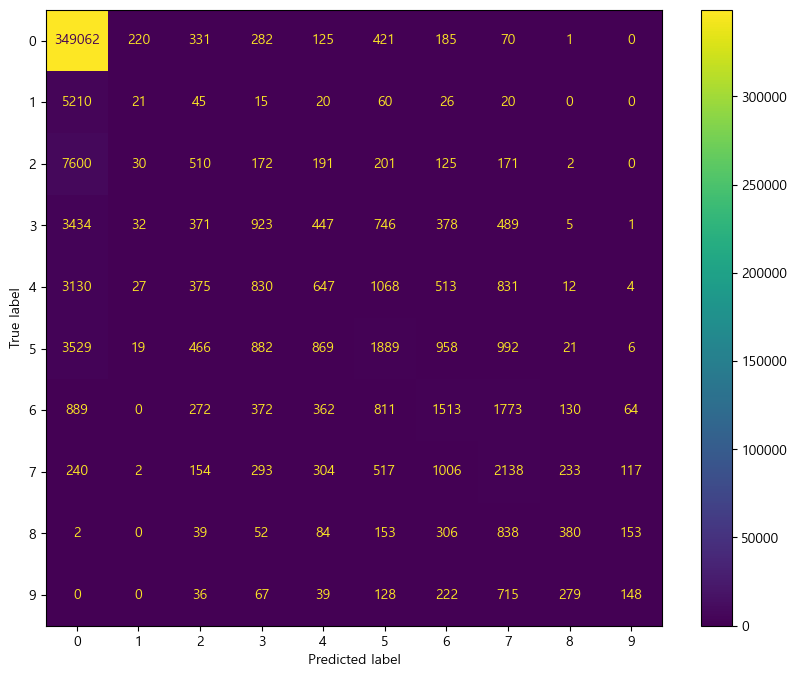

In [19]:
xgb = XGBClassifier(n_extimators=100)
xgb.fit(train_input, train_target)
y_pred = xgb.predict(test_input)

# 정확도 평가
accuracy = accuracy_score(test_target, y_pred)
print("Accuracy:", accuracy)

# 혼동 행렬 생성
cm = confusion_matrix(test_target, y_pred)

# 시각화
fig, ax = plt.subplots(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb.classes_)
disp.plot(ax=ax)
plt.show()

<Figure size 1500x10500 with 0 Axes>

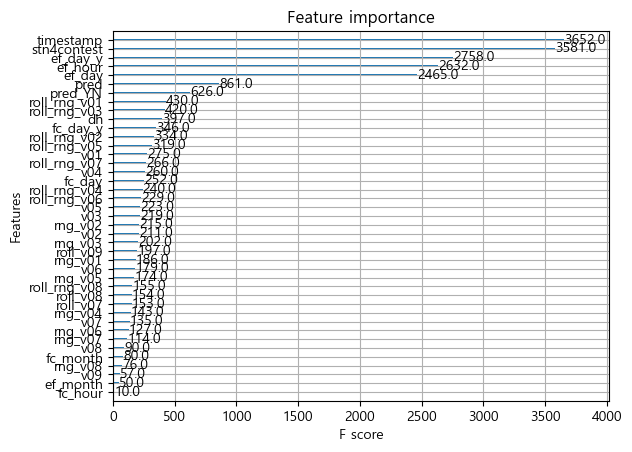

In [16]:
plt.figure(figsize=(15, 105))  # 그림 크기 조정
plot_importance(xgb, importance_type='weight')
plt.show()

# 변수정리

<Axes: >

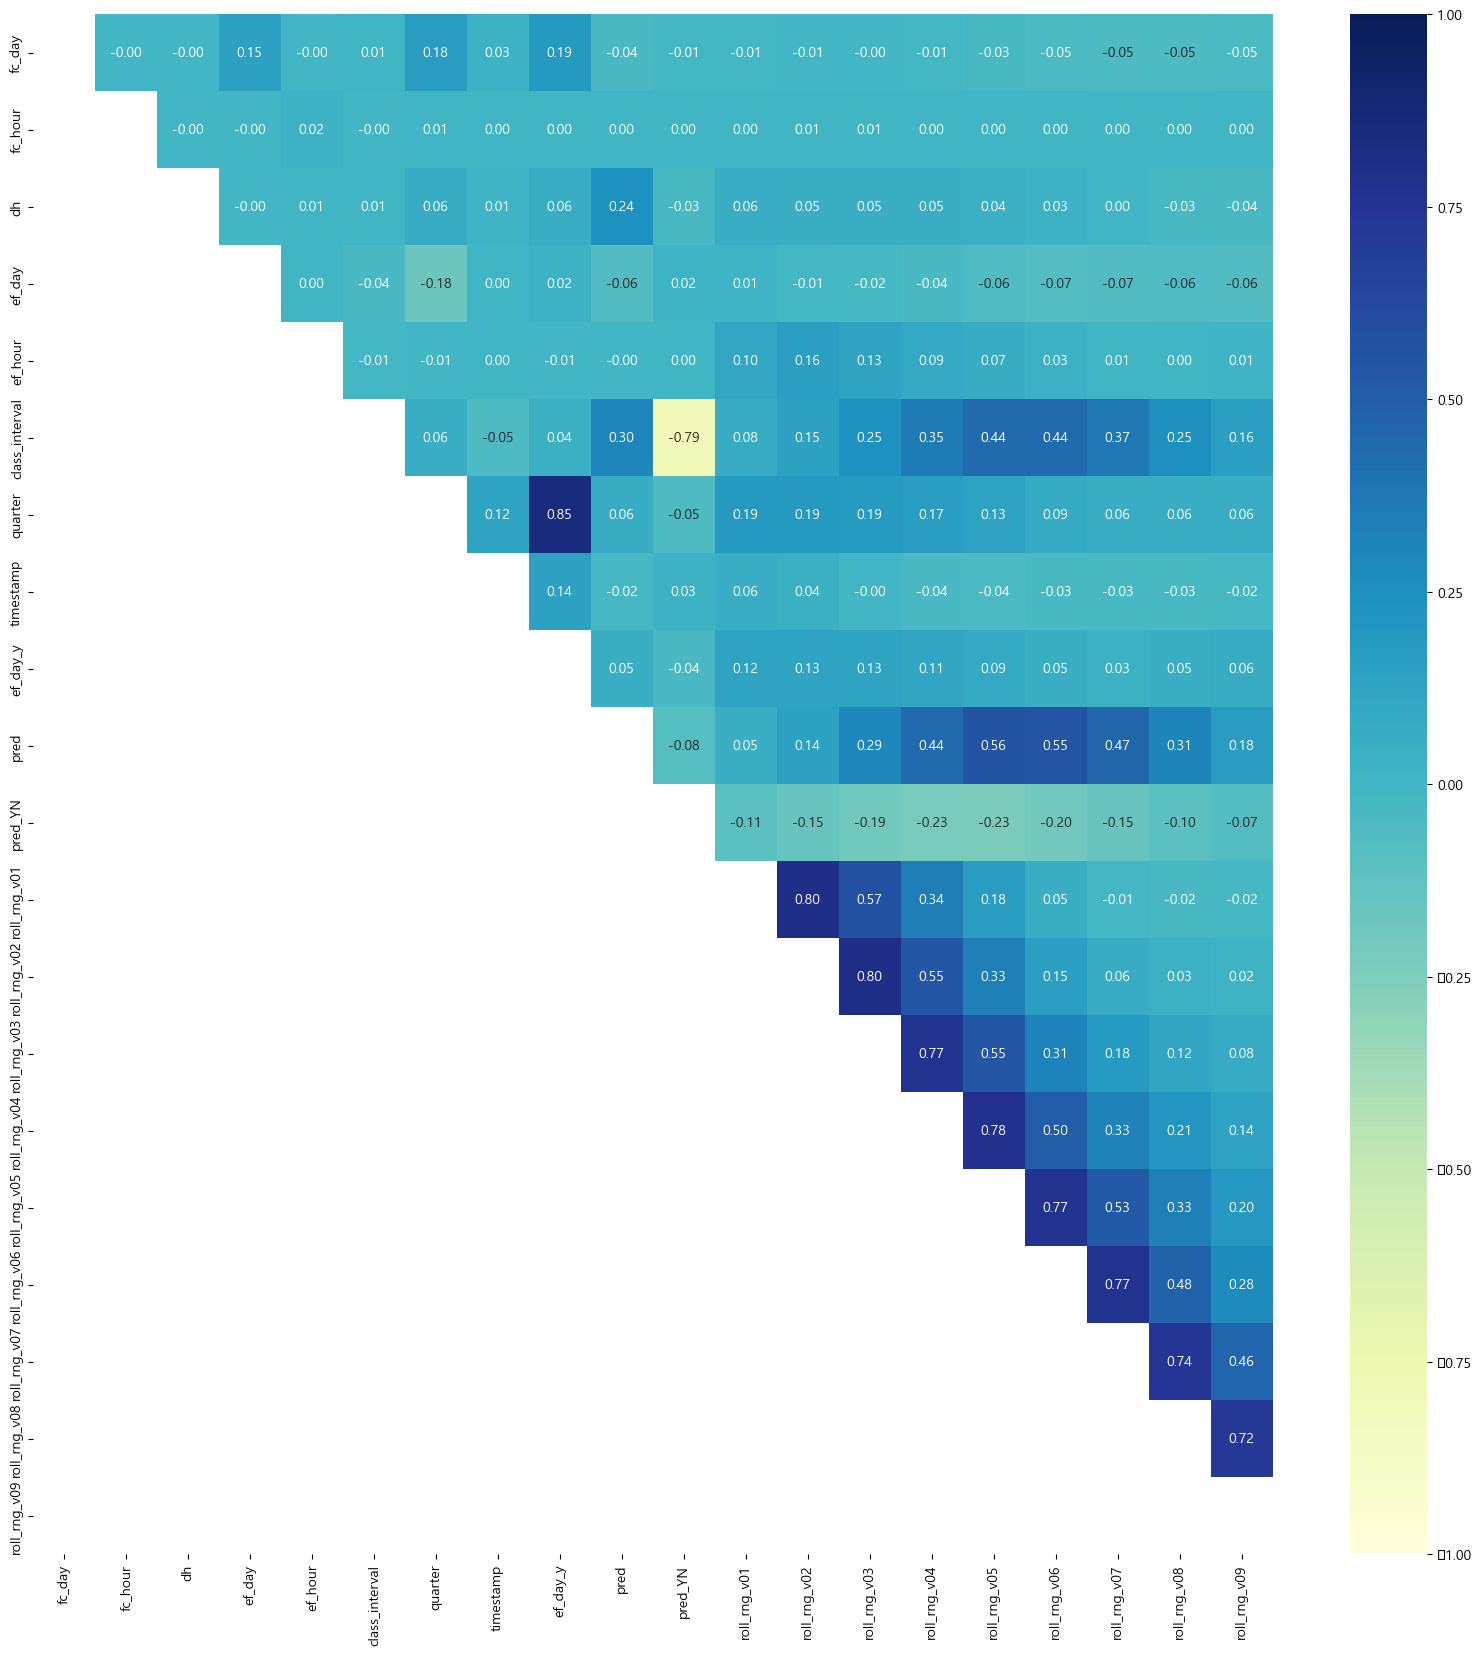

In [50]:
temp = rainfall.copy()
temp = temp.drop(columns= ['fc_month', 'ef_month', 'fc_day_y', 'stn4contest'] + [f'roll_v0{i}' for i in range(7,10)] + [f'v0{i}' for i in range(1,10)] + [f'rng_v0{i}' for i in range(1,10)])

temp2 = temp.corr()

mask = np.tril(np.ones_like(temp2, dtype=bool))

plt.figure(figsize=(20,20))
sns.heatmap(temp2, mask=mask, vmin=-1, vmax=1, annot=True, fmt=".2f", cmap="YlGnBu")

In [51]:
target = 'class_interval'
x = temp.drop(target, axis=1)
y = temp.loc[:, target]

train_input = x.iloc[:944157]
test_input = x.iloc[944157:]
train_target = y.iloc[:944157]
test_target = y.iloc[944157:]

Accuracy: 0.8812329604968292


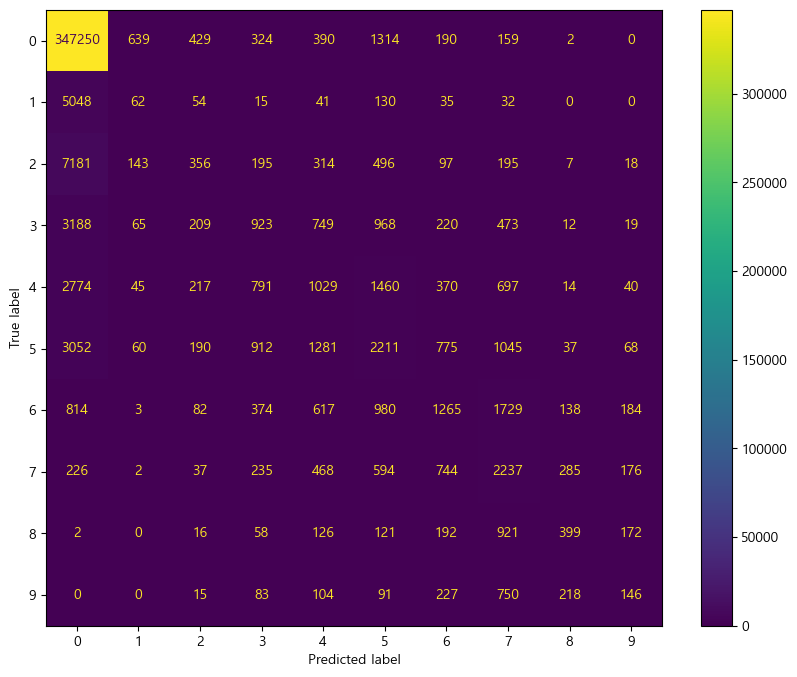

In [52]:
xgb = XGBClassifier(n_extimators=100)
xgb.fit(train_input, train_target)
y_pred = xgb.predict(test_input)

# 정확도 평가
accuracy = accuracy_score(test_target, y_pred)
print("Accuracy:", accuracy)

# 혼동 행렬 생성
cm = confusion_matrix(test_target, y_pred)

# 시각화
fig, ax = plt.subplots(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb.classes_)
disp.plot(ax=ax)
plt.show()

<Figure size 1500x3500 with 0 Axes>

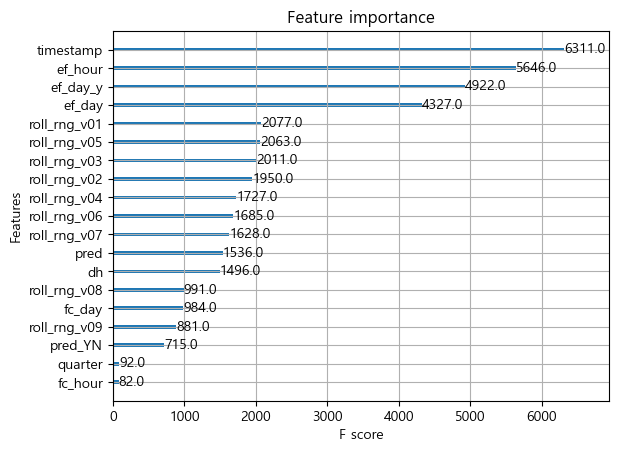

In [54]:
plt.figure(figsize=(15, 35))  # 그림 크기 조정
plot_importance(xgb, importance_type='weight')
plt.show()

Accuracy: 0.8871882745932186


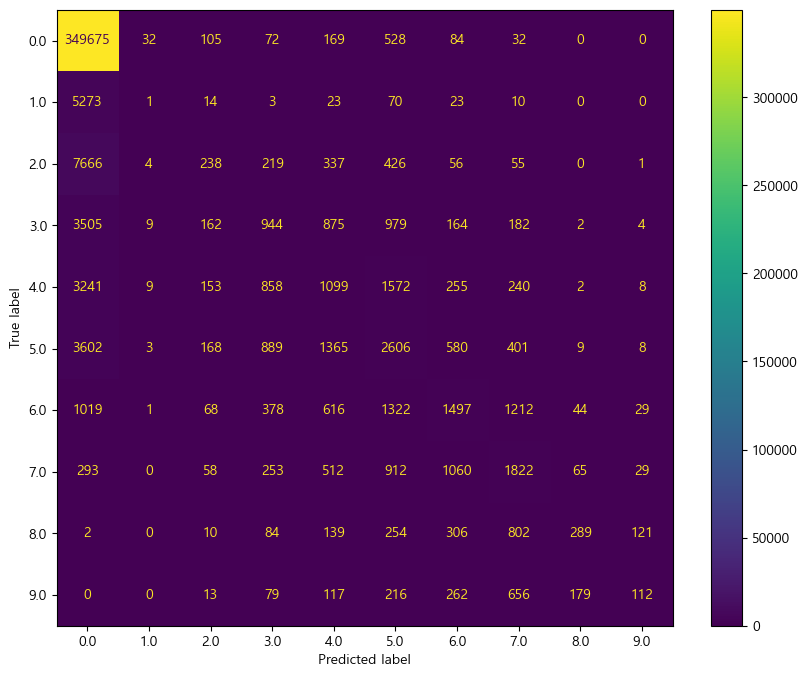

In [58]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(train_input, train_target)
y_pred = rf.predict(test_input)

# 정확도 평가
accuracy = accuracy_score(test_target, y_pred)
print("Accuracy:", accuracy)

# 혼동 행렬 생성
cm = confusion_matrix(test_target, y_pred)

# 시각화
fig, ax = plt.subplots(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(ax=ax)
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gbm.fit(train_input, train_target)
y_pred = gbm.predict(test_input)

# 정확도 평가
accuracy = accuracy_score(test_target, y_pred)
print("Accuracy:", accuracy)

# 혼동 행렬 생성
cm = confusion_matrix(test_target, y_pred)

# 시각화
fig, ax = plt.subplots(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gbm.classes_)
disp.plot(ax=ax)
plt.show()

# 튜닝

In [23]:
params = {
    'learning_rate': [0.005, 0.01, 0.1, 0.3],  # 학습률 (다양한 값 추가)
    'n_estimators': [100, 300, 500],  # 트리 개수 (다양한 값 추가)
    'max_depth': [5, 10, 20],  # 트리 최대 깊이 (다양한 값 추가)
    'min_child_weight': [1, 5, 20],  # 최소 자식 노드 가중치 (다양한 값 추가)
    'gamma': [0, 0.1, 0.2, 0.3],  # 가중치에 대한 페널티 (다양한 값 추가)
    'subsample': [0.8, 0.9, 1.0],  # 트리에 사용할 샘플 비율 (다양한 값 추가)
    'colsample_bytree': [0.8, 0.9, 1.0]  # 각 트리에 사용할 특성 비율 (다양한 값 추가)
}
# params = {
#     'learning_rate': [0.001, 0.005, 0.01, 0.1, 0.2, 0.3],  # 학습률 (다양한 값 추가)
#     'n_estimators': [100, 200, 300],  # 트리 개수 (다양한 값 추가)
#     'max_depth': [3, 4, 5, 6, 7, 8, 9],  # 트리 최대 깊이 (다양한 값 추가)
#     'min_child_weight': [1, 5, 10, 20],  # 최소 자식 노드 가중치 (다양한 값 추가)
#     'gamma': [0, 0.1, 0.2, 0.3],  # 가중치에 대한 페널티 (다양한 값 추가)
#     'subsample': [0.8, 0.9, 1.0],  # 트리에 사용할 샘플 비율 (다양한 값 추가)
#     'colsample_bytree': [0.8, 0.9, 1.0]  # 각 트리에 사용할 특성 비율 (다양한 값 추가)
# }

# 모델생성
xgb = XGBClassifier(random_state=42)

# AutoML모델 생성
gs = GridSearchCV(xgb, param_grid=params, n_jobs=-1, scoring='accuracy', cv=5)

# AutoML모델 훈련
gs.fit(train_input, train_target)

# 찾은 최적모델 사용
xgb = gs.best_estimator_
y_pred = xgb.predict(test_input)

accuracy = accuracy_score(test_target, y_pred)
print("Accuracy:", accuracy)
# 혼동 행렬 생성
cm = confusion_matrix(test_target, y_pred)

# 시각화
fig, ax = plt.subplots(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb.classes_)
disp.plot(ax=ax)
plt.show()

KeyboardInterrupt: 

In [ ]:
xgb = XGBClassifier(max_depth= ,n_extimators=100)
xgb.fit(train_input, train_target)
y_pred = xgb.predict(test_input)

# 정확도 평가
accuracy = accuracy_score(test_target, y_pred)
print("Accuracy:", accuracy)

# 혼동 행렬 생성
cm = confusion_matrix(test_target, y_pred)

# 시각화
fig, ax = plt.subplots(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb.classes_)
disp.plot(ax=ax)
plt.show()

In [82]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


print(df['target'].value_counts())


target
4    18
3    13
6    12
8    11
5    10
0    10
9     9
1     8
2     5
7     4
Name: count, dtype: int64


In [81]:
# 예제 데이터 생성
data = {
    'datetime': pd.date_range(start='2023-05-01', periods=100, freq='H'),
    'feature1': np.random.randn(100),
    'target': np.random.randint(0, 10, size=100)
}

df = pd.DataFrame(data)
# datetime을 인덱스로 설정
df.set_index('datetime', inplace=True)

x = df.drop(columns=['target'])
y = df['target']

X_train = x.iloc[:70]
X_test = x.iloc[70:]
y_train = y.iloc[:70]
y_test = y.iloc[70:]

# SMOTE 적용
smote = SMOTE(sampling_strategy=0.3, random_state=42, k_neighbors=1)
X_res, y_res = smote.fit_resample(X_train, y_train)

# 업샘플링된 데이터프레임 생성
df_resampled = pd.DataFrame(X_res, columns=x.columns)
df_resampled['target'] = y_res

print(df_resampled['target'].value_counts())


ValueError: "sampling_strategy" can be a float only when the type of target is binary. For multi-class, use a dict.

In [78]:
df

,feature1,target
datetime,,
2023-05-01 00:00:00,-0.835907,9
2023-05-01 01:00:00,-0.639590,3
2023-05-01 02:00:00,-1.059831,5
2023-05-01 03:00:00,-0.174262,3
2023-05-01 04:00:00,0.481372,5
...,...,...
2023-05-04 23:00:00,-0.047538,4
2023-05-05 00:00:00,-1.269471,8
2023-05-05 01:00:00,0.262932,2


In [77]:
df_resampled

,feature1,target
0,-0.835907,9
1,-0.639590,3
2,-1.059831,5
3,-0.174262,3
4,0.481372,5
...,...,...
95,-0.131721,8
96,0.206696,8
97,0.795589,9
98,-0.962098,9
